In [174]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import os

In [175]:
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [204]:
def read_csvs_in_folder(path_to_folder, input_device, verbose):
    file_in_folder = [file for file in os.listdir(path_to_folder) if os.path.isfile(os.path.join(path_to_folder, file))]

    dataframe_list = []
    for file in file_in_folder:
        temp_df = pd.read_csv(path_to_folder+"/"+file)
        # Get the data only for the wanted device
        if input_device is not None:
            # Clean the stonex dataframe from samples not coming from the wanted input device, from nan, and reset the index
            temp_df = temp_df.drop(temp_df[temp_df['Input'] != input_device].index)
            if input_device == "STON":
                temp_df = temp_df.dropna()
            temp_df = temp_df.reset_index(drop=True)

        dataframe_list.append(temp_df)
        if verbose:
            print("Input dataframe for the wanted device\n", temp_df)

    if verbose:
        print(f"\nProcessed {len(file_in_folder)} files {file_in_folder} from folder '{path_to_folder}'\n")
    return dataframe_list

In [205]:
def plot_chart(dataframe, input_device, first_frame, last_frame, verbose=False):
    # Clean the stonex dataframe from samples with Stonex_status different from 2 since they are not accurate (we keep the one with "null" value so that this function can also be used to analyze lat-lon smartphone data)
    if input_device == "STON":
        dataframe = dataframe.drop(dataframe[dataframe['Stonex_status'] != 2].index)
        device = "STONEX"
    else:
        device = "SMARTPHONE"

    dataframe = dataframe[first_frame:last_frame]
    if verbose:
        print(f"Input sliced dataframe for the wanted device: {device}\n", dataframe)


    fig, ax = plt.subplots()
    ax.plot(dataframe['Latitude'], label="Latitude")
    ax.set_title(f"{device} Latitude")
    ax.set_ylabel("Latitude")
    ax.set_xlabel("Sample [5Hz]")

    fig2, ax2 = plt.subplots()
    ax2.plot(dataframe['Longitude'], label="Longitude")
    ax2.set_title(f"{device} Longitude")
    ax2.set_ylabel("Longitude")
    ax2.set_xlabel("Sample [5Hz]")

    fig2.set_figwidth(15)
    fig2.set_figheight(5)
    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.show()

In [206]:
def plot_lat_lon_charts_of_the_day_for_device(day_folder, input_device=None, first_last_frame_tuple_list=[], verbose_slice=True, verbose_extraction=False):
    # Ensure that the input device is a valid device
    assert input_device == "SMAR" or input_device == "STON", "Input device must be SMAR or STON"
    dataframe_list = read_csvs_in_folder(day_folder +"/measurement", input_device, verbose_extraction)
    for idx, df in enumerate(dataframe_list):
        # Cut the wanted part of the chart
        assert idx <= len(first_last_frame_tuple_list) - 1, "Input argument first_last_frame_tuple_list has not enough tuple to continue the process"
        first_frame = first_last_frame_tuple_list[idx][0]
        last_frame = first_last_frame_tuple_list[idx][1]
        if last_frame == 0:
            last_frame = len(df) - 1
        # Plot chart sliced as required
        plot_chart(df, input_device, first_frame, last_frame, verbose_slice)

# Analysis of Latitude and Longitude
#### Measurements specific for the Lat, Lon have been carried on in the day of 2023_5_9 at time 17:15:55sec

Input sliced dataframe for the wanted device: STONEX
     Input                     Time   Latitude  Longitude  Altitude      Pitch        Yaw      Roll  Stonex_status
0    STON  2023-05-09 17:15:55.369  46.089761  11.115525   198.260 -10.691818  -1.929142 -0.842404            2.0
1    STON  2023-05-09 17:15:55.463  46.089761  11.115525   198.260 -10.712424  -1.641561 -0.917443            2.0
2    STON  2023-05-09 17:15:55.565  46.089761  11.115525   198.260 -10.712424  -1.641561 -0.917443            2.0
3    STON  2023-05-09 17:15:55.632  46.089761  11.115525   198.260 -10.869088  -1.526051 -0.967361            2.0
4    STON  2023-05-09 17:15:55.765  46.089761  11.115525   198.260 -10.869088  -1.526051 -0.967361            2.0
..    ...                      ...        ...        ...       ...        ...        ...       ...            ...
773  STON  2023-05-09 17:17:15.509  46.089832  11.115524   198.294 -10.971588  91.368332 -0.075982            2.0
774  STON  2023-05-09 17:17:15.595

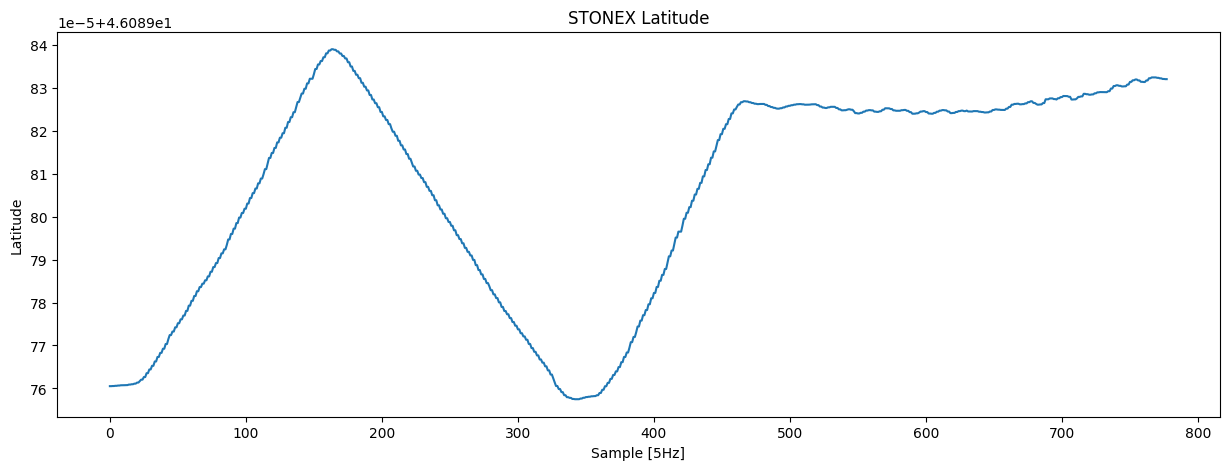

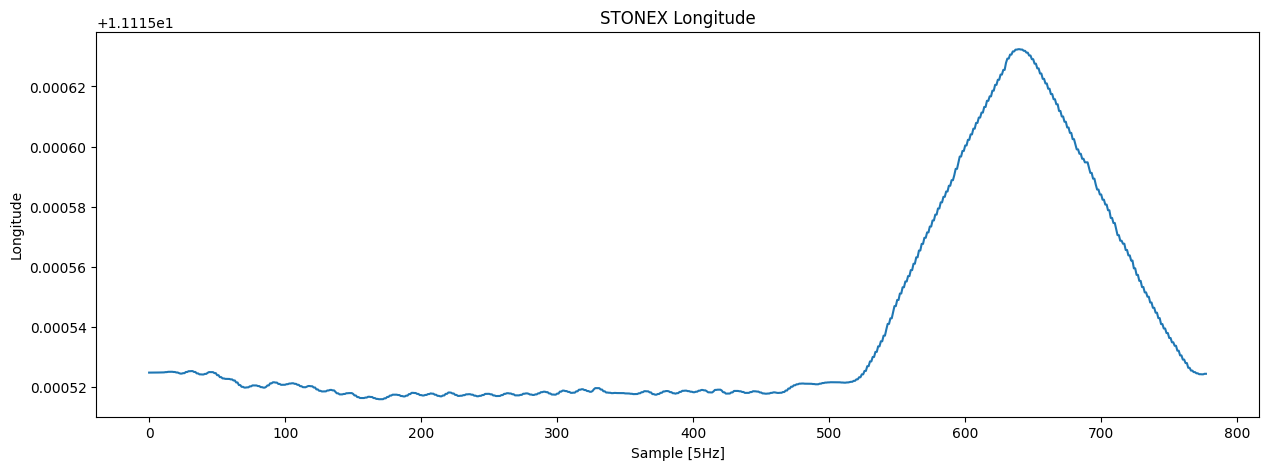

In [211]:
plot_lat_lon_charts_of_the_day_for_device("files/2023_5_9/selected_lat_lon_files", "STON", [(0,0)], True, False)

Input sliced dataframe for the wanted device: SMARTPHONE
      Input                     Time   Latitude  Longitude    Altitude  Pitch    Yaw  Roll  Stonex_status
0     SMAR  2023-05-09 17:15:55.336  46.089823  11.115544  244.899994 -11.17 -73.97  0.84            NaN
1     SMAR  2023-05-09 17:15:55.369  46.089823  11.115544  244.899994 -11.19 -73.89  0.82            NaN
2     SMAR  2023-05-09 17:15:55.402  46.089823  11.115544  244.899994 -11.22 -73.93  0.82            NaN
3     SMAR  2023-05-09 17:15:55.432  46.089823  11.115544  244.899994 -11.25 -73.91  0.81            NaN
4     SMAR  2023-05-09 17:15:55.463  46.089823  11.115544  244.899994 -11.28 -73.83  0.78            NaN
...    ...                      ...        ...        ...         ...    ...    ...   ...            ...
2415  SMAR  2023-05-09 17:17:16.164  46.089849  11.115554  244.799988 -12.06  20.68  3.39            NaN
2416  SMAR  2023-05-09 17:17:16.199  46.089849  11.115554  244.799988 -12.07  20.93  3.32            N

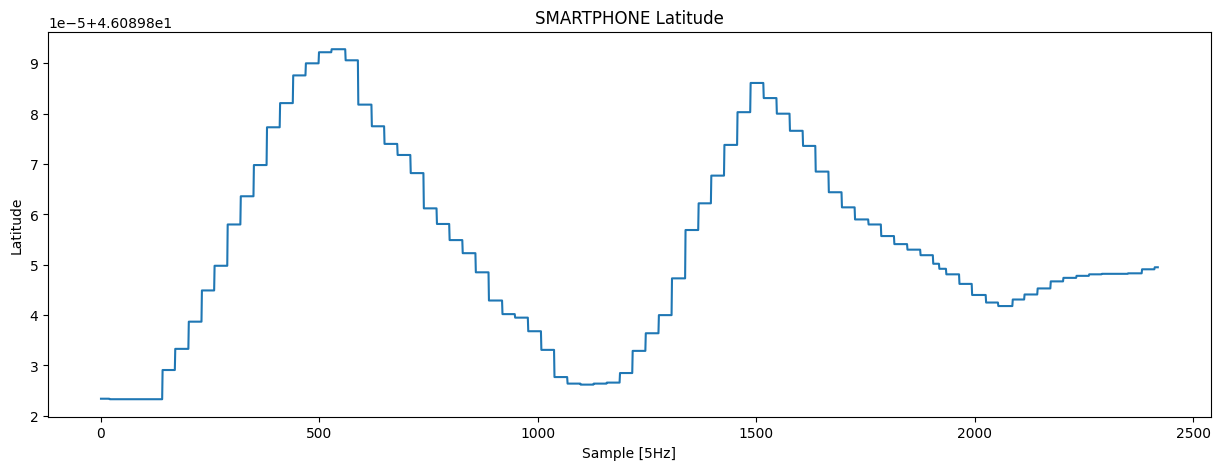

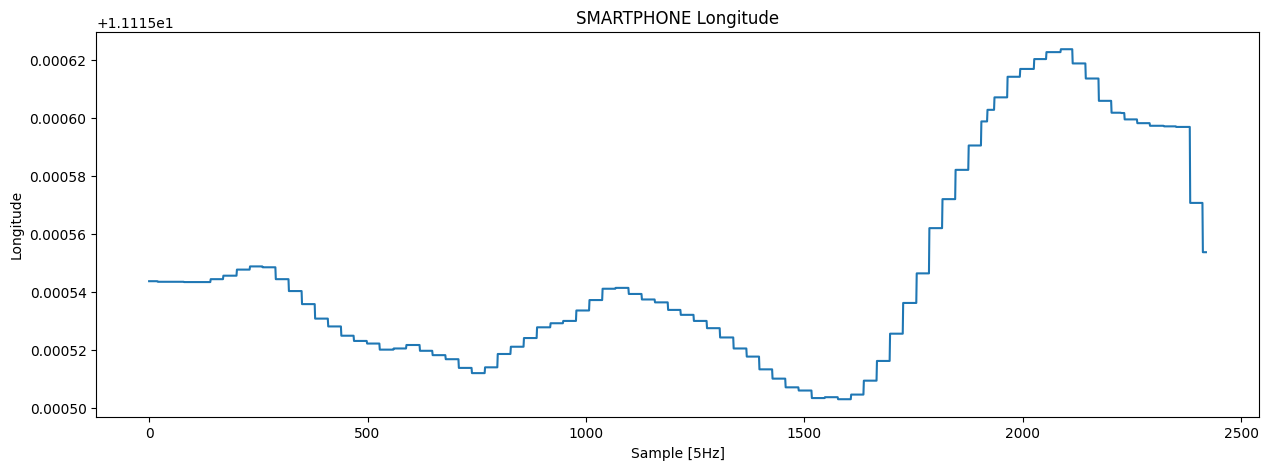

In [212]:
plot_lat_lon_charts_of_the_day_for_device("files/2023_5_9/selected_lat_lon_files", "SMAR", [(0,0)], True, False)